# Patch Identificaiton

This script covers the method of training the patch identification model.

This model is defined in `models.patch_identification`. The behavior of some of the functioins (e.g. `train()`) should be changed within the above script. 

In [1]:
%cd ..

/Users/bdhammel/Documents/insight/harvesting


In [2]:
%matplotlib inline

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import keras
import os

from pipeline import utils as pipe_utils
from pipeline.raw_data import utils as clean_utils
from models import patch_identifier

PROJ_DIR = os.getcwd()
test_image_path = os.path.join(PROJ_DIR, 'datasets/raw_images/test_patch.jpg')
model_path = os.path.join(PROJ_DIR, 'models/saved_models/patch_identifier.h5')

Using TensorFlow backend.


## Training

In [3]:
dataset_dir = os.path.join(PROJ_DIR, 'datasets/patch_identification/whu_rs19')
model = patch_identifier.trainer(dataset_dir)

--------------------------------------------------
Training the classifier, i.e. dense layers
Model has 170 layers, freezing layers 0-164
Epoch 1/4
7/7 [==============================] - 35s 5s/step - loss: 1.8700 - acc: 0.2319 - val_loss: 13.3478 - val_acc: 0.1719
Epoch 2/4
7/7 [==============================] - 33s 5s/step - loss: 1.4754 - acc: 0.4132 - val_loss: 13.1792 - val_acc: 0.1719
Epoch 3/4
7/7 [==============================] - 32s 5s/step - loss: 1.0098 - acc: 0.6737 - val_loss: 13.3478 - val_acc: 0.1719
Epoch 4/4
7/7 [==============================] - 32s 5s/step - loss: 0.7773 - acc: 0.7903 - val_loss: 13.3478 - val_acc: 0.1719
--------------------------------------------------
Training the full model
Epoch 1/1
7/7 [==============================] - 95s 14s/step - loss: 0.3459 - acc: 0.9057 - val_loss: 0.2217 - val_acc: 0.9375
--------------------------------------------------
Finished Training
107/107 [==============================] - 15s 143ms/step
Accuracy: 92.52%


Uncommenting the above line will give you something of the sorts:
```
--------------------------------------------------
Training the classifier, i.e. dense layers
Model has 170 layers, freezing layers 0-164
Epoch 1/4
7/7 [==============================] - 36s 5s/step - loss: 1.7959 - acc: 0.2621 - val_loss: 13.3268 - val_acc: 0.1719
Epoch 2/4
7/7 [==============================] - 36s 5s/step - loss: 1.3708 - acc: 0.4685 - val_loss: 13.0160 - val_acc: 0.1562
Epoch 3/4
7/7 [==============================] - 35s 5s/step - loss: 1.0802 - acc: 0.6287 - val_loss: 13.3478 - val_acc: 0.1719
Epoch 4/4
7/7 [==============================] - 35s 5s/step - loss: 0.7815 - acc: 0.7530 - val_loss: 13.3478 - val_acc: 0.1719
--------------------------------------------------
Training the full model
Epoch 1/1
7/7 [==============================] - 100s 14s/step - loss: 0.4421 - acc: 0.8668 - val_loss: 0.4066 - val_acc: 0.9219
--------------------------------------------------
Finished Training
107/107 [==============================] - 14s 135ms/step
Accuracy: 91.59%
```

In [4]:
model.save(model_path)
#model = keras.models.load_model(model_path)

(-0.5, 399.5, 399.5, -0.5)

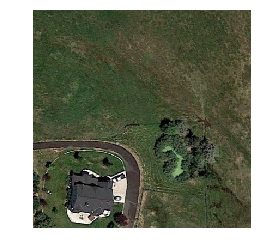

In [5]:
raw_img = clean_utils.read_raw_image(test_image_path, report=False)
plt.imshow(raw_img)
plt.axis('off')

In [6]:
model = patch_identifier.PatchIdentifier(model_path)

In [7]:
raw_batch = pipe_utils.as_batch(raw_img, shape=(200,200,3))
batch = pipe_utils.preprocess_image_for_model(raw_batch, use='patch')

In [8]:
predictions = model.predict(batch)

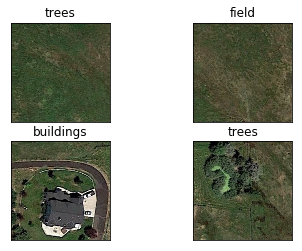

In [9]:
f, axes = plt.subplots(2,2)
labels = pipe_utils.ids_to_classes(predictions, use='patch')
axes[0,0].imshow(raw_batch[0])
axes[0,0].set_title(labels[0])
axes[0,1].imshow(raw_batch[1])
axes[0,1].set_title(labels[1])
axes[1,0].imshow(raw_batch[2])
axes[1,0].set_title(labels[2])
axes[1,1].imshow(raw_batch[3])
axes[1,1].set_title(labels[3])

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])